# Introduction

## ITL-Interview task : Image classification

### Problem Statement

If you had 10,000 pictures of oranges and 1,000 pictures of apples, implement a simple pipeline for classifying these images.

# Step 1: Environment Setup and Data Loading

## 1.1 Install Dependencies

In [9]:
!pip install tensorflow opencv-python

In [78]:
# Import relavant libraries


import os
from matplotlib import pyplot as plt

# image data preprocessing libarires
import cv2
from PIL import Image


# Data loading
import numpy as np

# deep learning libaries
import tensorflow as tf

## 1.2 Image Data Instantiation

In [34]:
# instantiate the image director
image_dir = 'data'

# Display the list of directories in the image_dir
os.listdir(image_dir)

['apples', 'oranges']

## 1.3 Initial Data Pre-processing

In [55]:
# Remove images with inappropriate image extentions

def remove_inappropriate_images(directory, image_extensions):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Remove spaces from the file name
            new_file_name = file.replace(" ", "").replace("(", "").replace(")", "")
            file_path = os.path.join(root, file)
            new_file_path = os.path.join(root, new_file_name)

            # Check file extension and remove if inappropriate
            _, file_extension = os.path.splitext(file)
            if file_extension.lower() not in image_extensions:
                os.remove(file_path)
    
            elif file != new_file_name:
                os.rename(file_path, new_file_path)
                

In [56]:
# In appropriate iamge function Call

# Define suitable image extensions
image_exts = ['.jpeg','.jpg','.bmp','.png']

remove_inappropriate_images(image_dir, image_exts)

In [72]:
# lets view an image using the openCV libriary

view_image = cv2.imread(os.path.join(image_dir,'apples', 'shopping1.jpeg'))


In [73]:
view_image.shape

(460, 460, 3)

The shape of the image **shopping1.jpeg** tells us that the image is made of 460 pixels high and 460 pixels wide with a channel of 3 which indicates the image is colored.

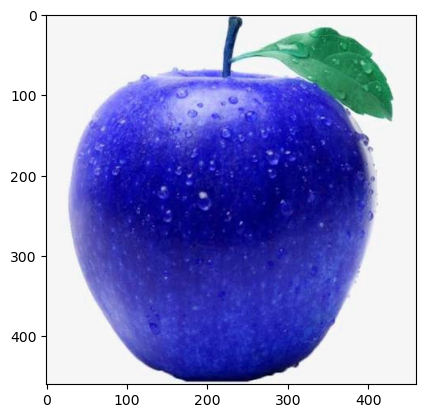

In [74]:
# lets visualize the image
plt.imshow(view_image)

## 1.4 Data Loading

In [81]:
image_data = tf.keras.utils.image_dataset_from_directory(image_dir)

Found 325 files belonging to 2 classes.


In [83]:
# Convert the image_data into a numpy iterator in order to access the it
image_data_iterator = image_data.as_numpy_iterator()

In [84]:
# Fetch image batches
image_batch = image_data_iterator.next()
